In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("train_news.csv")
df.head()
# 0- not fake

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(20800, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id            20800 non-null int64
headline      20242 non-null object
written_by    18843 non-null object
news          20761 non-null object
label         20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [7]:
df.columns


Index(['id', 'headline', 'written_by', 'news', 'label'], dtype='object')

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


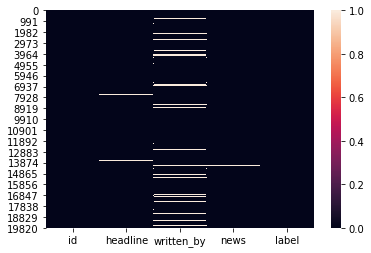

In [8]:
# checking null values
print(df.isnull().sum())
print(sns.heatmap(df.isnull()))

            id    label
id     1.00000  0.00114
label  0.00114  1.00000
AxesSubplot(0.125,0.125;0.62x0.755)


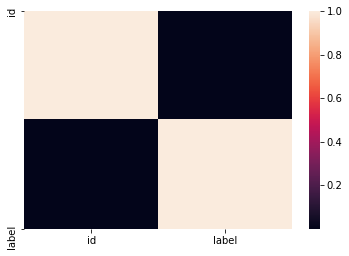

In [9]:
## checking correlation in dataset
print(df.corr())
print(sns.heatmap(df.corr()))

In [10]:
# checking the skewness for the features:
df.skew()

id       0.0000
label   -0.0025
dtype: float64

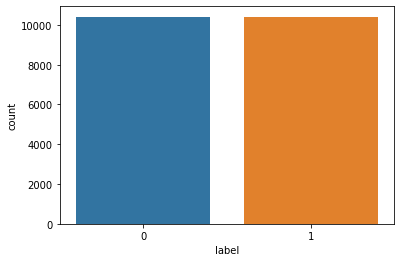

In [11]:
#checking the target variable
# The dataset target variables are balanced

sns.countplot(df['label'])

In [12]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

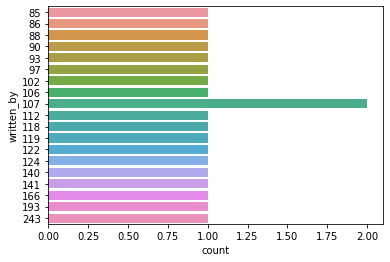

In [13]:

sns.countplot(y=df['written_by'].value_counts()[0:20])

In [14]:
df.drop('written_by',inplace=True,axis=1)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(20203, 4)

In [17]:
df.isnull().sum()

id          0
headline    0
news        0
label       0
dtype: int64

In [18]:
df.shape

(20203, 4)

In [19]:
df['description']=df['headline']+df['news']

In [20]:
df['description']

0        Ethics Questions Dogged Agriculture Nominee as...
1        U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2        Cotton to House: ’Do Not Walk the Plank and Vo...
3        Paul LePage, Besieged Maine Governor, Sends Co...
4        A Digital 9/11 If Trump Wins  Finian Cunningha...
                               ...                        
20794    One Police Shift: Patrolling an Anxious Americ...
20796    Albert Pike and the European Migrant CrisisBy ...
20797    Dakota Access Caught Infiltrating Protests to ...
20798    How to Stretch the Summer Solstice - The New Y...
20799    Emory University to Pay for ’100 Percent’ of U...
Name: description, Length: 20203, dtype: object

In [21]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [22]:
df['length'] = df['news'].str.len()
df.head(2)

,id,headline,news,label,description,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...,7936
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6112


In [23]:
# Convert all messages to lower case
df['news'] = df['news'].str.lower()

# Replace email addresses with 'email'
df['news'] = df['news'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['news'] = df['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['news'] = df['news'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['news'] = df['news'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['news'] = df['news'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
df['news'] = df['news'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [24]:
df['clean_length'] = df.news.str.len()
df.head()

,id,headline,news,label,description,length,clean_length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,"washington — sonny perdue’s telling, georgian ...",0,Ethics Questions Dogged Agriculture Nominee as...,7936,5846
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,"houston — venezuela plan. tactical approach, d...",0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,6112,4463
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,"sunday abc’s “this week,” discussing republica...",0,Cotton to House: ’Do Not Walk the Plank and Vo...,425,301
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...","augusta, me. — beleaguered republican governor...",0,"Paul LePage, Besieged Maine Governor, Sends Co...",6516,4744
4,7596,A Digital 9/11 If Trump Wins,finian cunningham written extensively internat...,1,A Digital 9/11 If Trump Wins Finian Cunningha...,9164,6914


In [25]:
df['label'].value_counts()

0    10387
1     9816
Name: label, dtype: int64

In [26]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 94308498
Clean Length 69298865


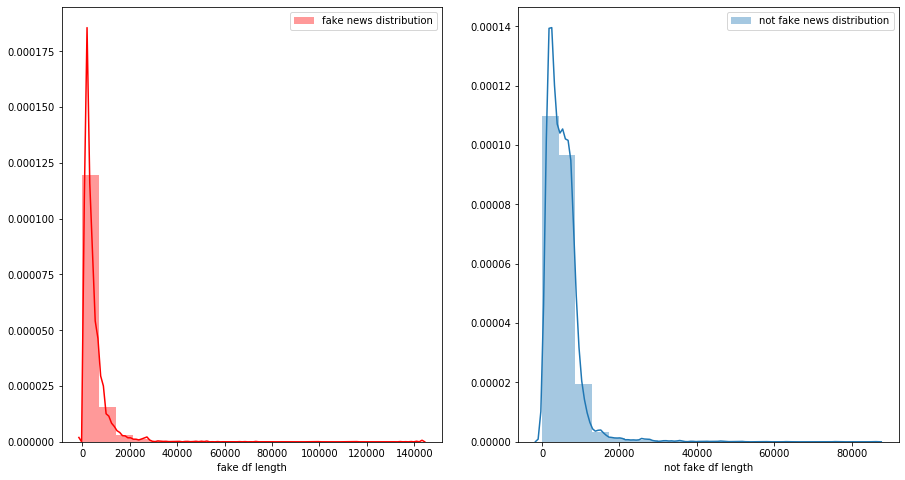

In [27]:
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='fake news distribution',color='r')

ax[0].set_xlabel('fake df length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='not fake news distribution')
ax[1].set_xlabel('not fake df length')
ax[1].legend()

plt.show()

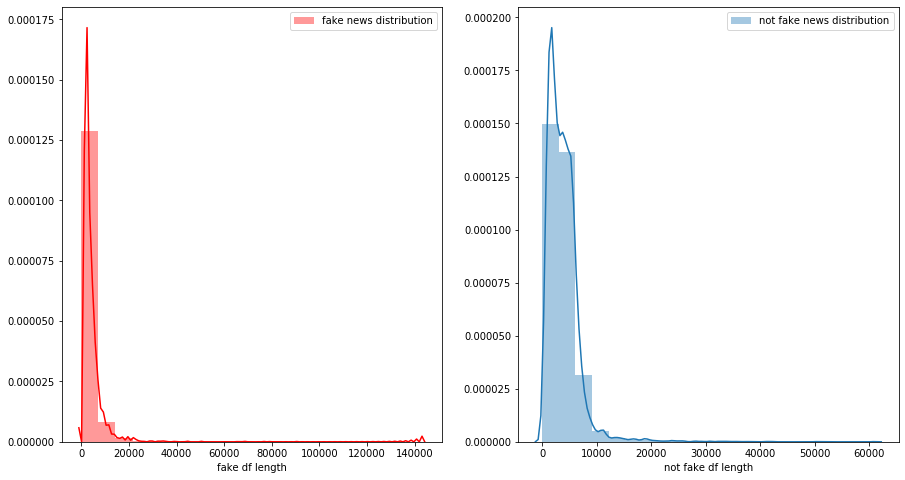

In [28]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='fake news distribution',color='r')
ax[0].set_xlabel('fake df length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='not fake news distribution')
ax[1].set_xlabel('not fake df length')
ax[1].legend()

plt.show()

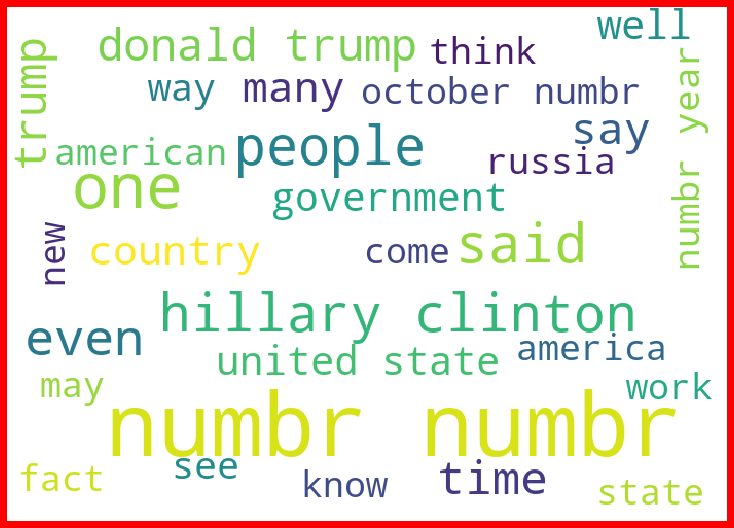

In [29]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud



spams = df['news'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

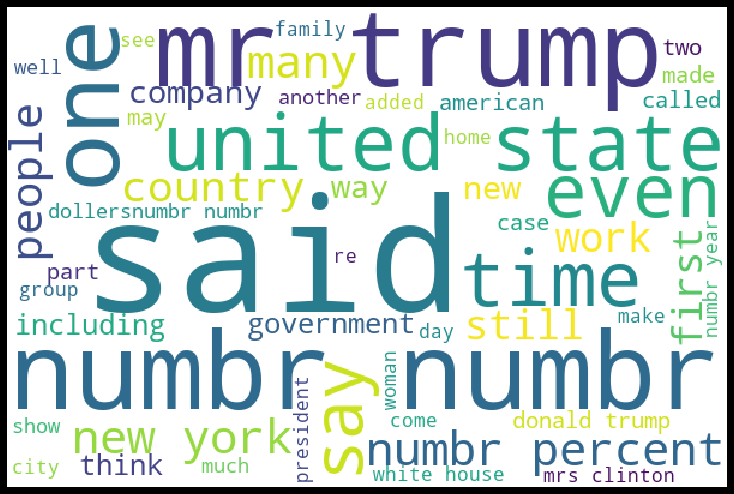

In [30]:
hams = df['news'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [32]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['news'])
x = features
y = df['label']

In [35]:
# random forest calssifier
rfr=RandomForestClassifier()
parameters={'n_estimators':[1,10,50,100]}
clfr=GridSearchCV(rfr,parameters ,scoring='accuracy', cv=10)
clfr.fit(x,y)
clfr.best_params_

{'n_estimators': 100}

In [36]:
## decision tree classifier
dtc=DecisionTreeClassifier()
param={'criterion':['gini','entropy']}
clf=GridSearchCV(dtc,param)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy'}

In [39]:
# LogisticRegression
lg=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
clf=GridSearchCV(lg,grid)
clf.fit(x,y)
clf.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [40]:
def max_acc_Score(classifier,x_new,y):
    max_r_score=0
    for r_state in range(42,90):
        x_train, x_test, y_train, y_test=train_test_split(x_new,y,random_state=r_state,test_size=0.22)
        classifier.fit(x_train,y_train)
        y_pred=classifier.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        print('accuracy score corr to random state',r_state,'is:',acc_scr)
        if acc_scr>max_r_score:
            max_r_score=acc_scr
            final_r_state=r_state
    print()
    print()
    print("max acc score corr to ",final_r_state,'is',max_r_score)       
    return final_r_state 

In [41]:
#finding best rstate and acc score  for random forest classifier:
rfc=RandomForestClassifier(n_estimators=100)
r_state=max_acc_Score(rfc,x,y)

accuracy score corr to random state 42 is: 0.9120359955005625
accuracy score corr to random state 43 is: 0.9149606299212598
accuracy score corr to random state 44 is: 0.9136107986501687
accuracy score corr to random state 45 is: 0.9147356580427447
accuracy score corr to random state 46 is: 0.9136107986501687
accuracy score corr to random state 47 is: 0.9039370078740158
accuracy score corr to random state 48 is: 0.9165354330708662
accuracy score corr to random state 49 is: 0.9106861642294714
accuracy score corr to random state 50 is: 0.912710911136108
accuracy score corr to random state 51 is: 0.9158605174353206
accuracy score corr to random state 52 is: 0.917660292463442
accuracy score corr to random state 53 is: 0.9133858267716536
accuracy score corr to random state 54 is: 0.9129358830146231
accuracy score corr to random state 55 is: 0.9136107986501687
accuracy score corr to random state 56 is: 0.9277840269966254
accuracy score corr to random state 57 is: 0.9158605174353206
accuracy s

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [43]:
    rfr=RandomForestClassifier(n_estimators=100)
    knn=KNeighborsClassifier(n_neighbors=9)
    ada=AdaBoostClassifier(n_estimators=100)
    gbr=GradientBoostingClassifier(n_estimators=100)
    dtr=DecisionTreeClassifier(criterion='entropy')
    lr=LogisticRegression(penalty='l2')
    naive = MultinomialNB()

    models = []
    models.append(('randomforest classifer', rfr))
    models.append(('kneighbors classifier', knn))
    models.append(('ada boost classifier', ada))
    models.append(('gradient boosting classifier', gbr))
    models.append(('decisiontree classifier', dtr))
    models.append(('logistic regression classifier', lr))
    models.append(('multinomial nb', naive))

******** randomforest classifer *******


RandomForestClassifier()


acc_score= 0.9209701369410989


F1_score= 0.916009118008066


cross_val_sc= 0.9197652372857277


roc_auc_sc= 0.9200440137890694


classification_repo
               precision    recall  f1-score   support

           0       0.90      0.95      0.93      3113
           1       0.95      0.89      0.92      2948

    accuracy                           0.92      6061
   macro avg       0.92      0.92      0.92      6061
weighted avg       0.92      0.92      0.92      6061



[[2970  143]
 [ 336 2612]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******** kneighbors classifier *******


KNeighborsClassifier(n_neighbors=9)


acc_score= 0.5188912720673157


F1_score= 0.6687869150386188


cross_val_sc= 0.5246741638537926


roc_auc_sc= 0.5316055443949542


classification_repo
               precision    recall  f1-score   support

           0       0.98      0.06      0.12      3113
           1       0.50      1.00   

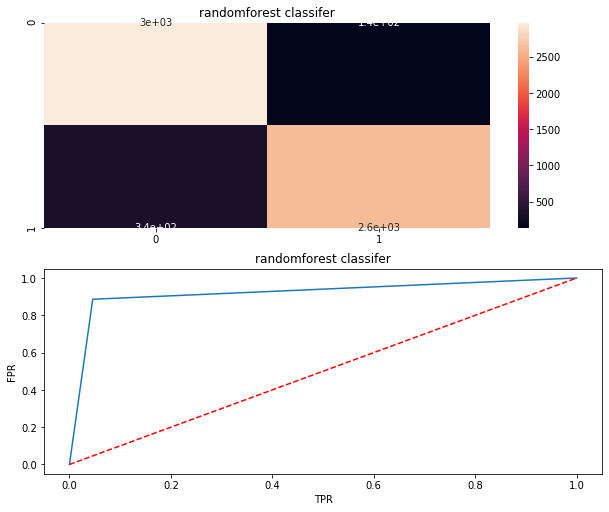

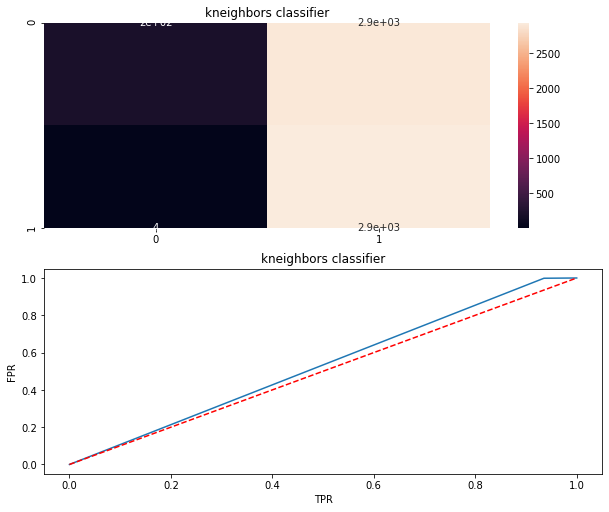

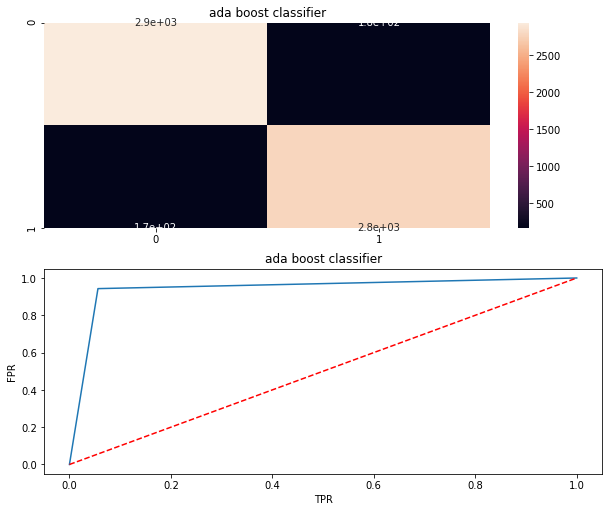

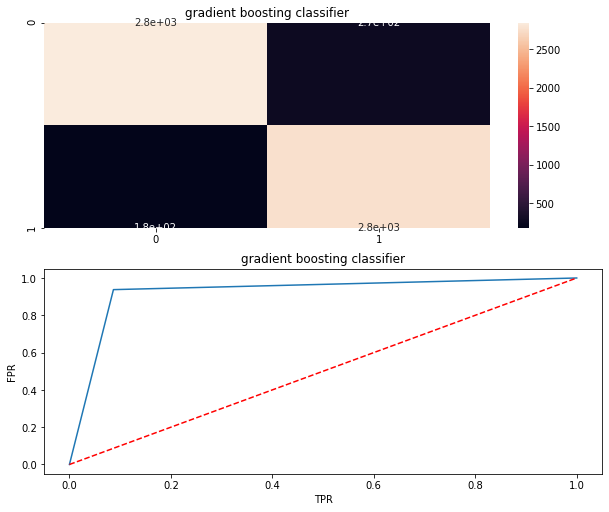

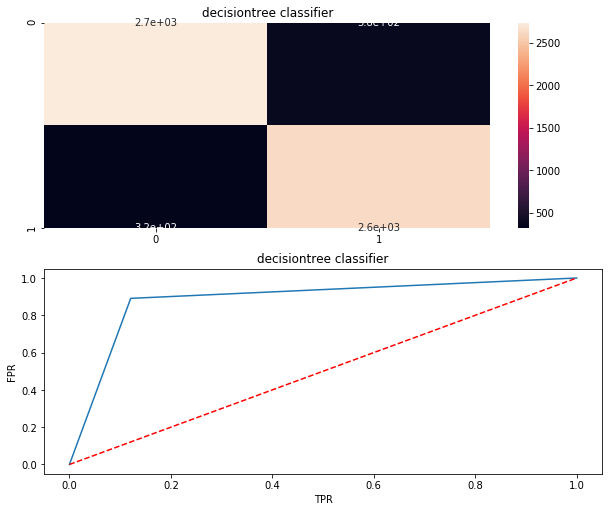

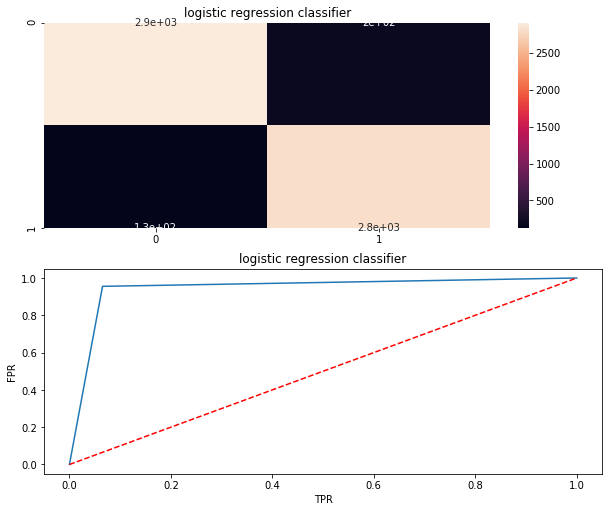

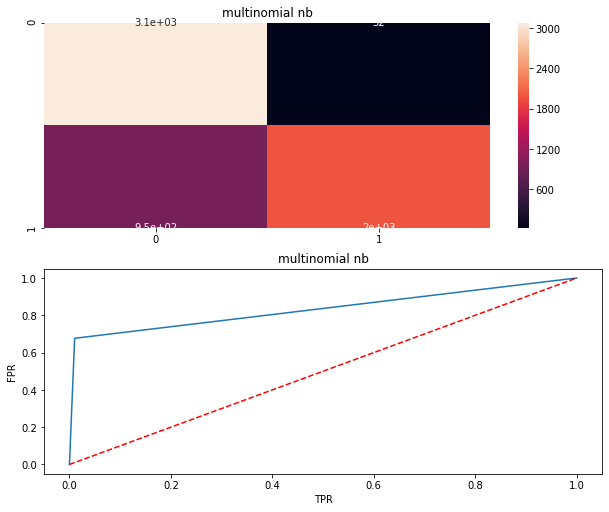

In [45]:
Model=[]
score=[]
cvs=[]
rocscore=[]
F1=[]
for name,model in models:
    print('********',name,'*******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("acc_score=",AS)
    score.append(AS*100)
    print('\n')
    f1=f1_score(pre,y_test)
    print("F1_score=",f1)
    F1.append(f1*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_sc=',sc)
    cvs.append(sc*100)
    print('\n')
    fpr,tpr,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print("roc_auc_sc=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_repo\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    print('\n\n')

In [49]:
result=pd.DataFrame({'model_name':Model,'accuracy_score':score,'f1_score':F1,'cross_val_score':cvs,'roc_score':rocscore})
result

,model_name,accuracy_score,f1_score,cross_val_score,roc_score
0,randomforest classifer,92.097014,91.600912,91.976524,92.004401
1,kneighbors classifier,51.889127,66.878692,52.467416,53.160554
2,ada boost classifier,94.340868,94.189395,93.995904,94.339817
3,gradient boosting classifier,92.509487,92.410565,92.550597,92.542587
4,decisiontree classifier,88.483749,88.268908,88.655116,88.499480
5,logistic regression classifier,94.472859,94.385789,95.045329,94.500674
6,multinomial nb,83.748556,80.201005,84.636025,83.322526


In [63]:
# predicting results using that :
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
ac_score=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred)
print("f1 score :",f1*100)
print('\n') 
print('Accuracy Score :',ac_score*100)
print('\n') 
cvs=cross_val_score(ada, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print('\n')
print('confusion matrix :',confusion_matrix(y_test,pred))
print('\n') 
print('Classification report :',classification_report(y_test,pred))


f1 score : 94.18939522276808


Accuracy Score : 94.34086784359017


cross validation score : 93.99590439004315


confusion matrix : [[2938  175]
 [ 168 2780]]


Classification report :               precision    recall  f1-score   support

           0       0.95      0.94      0.94      3113
           1       0.94      0.94      0.94      2948

    accuracy                           0.94      6061
   macro avg       0.94      0.94      0.94      6061
weighted avg       0.94      0.94      0.94      6061



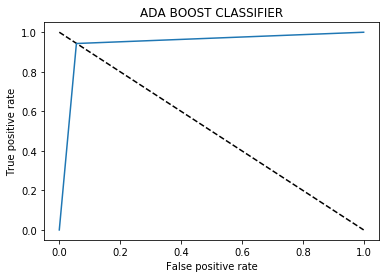

In [67]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,pred)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Ada Boost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ADA BOOST CLASSIFIER')
plt.show()


In [68]:
# models.append(('svc', svc))
# ada boost is giving best accuracy score
# also no over / under fitting is present in ada boost technique
# prediction over it 
pred_ada = ada.predict(x)
pred_ada

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

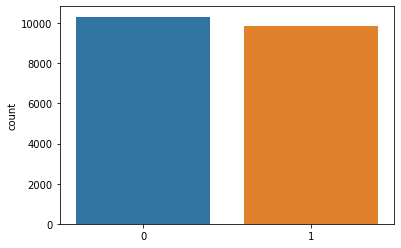

In [69]:
sns.countplot(pred_ada)

In [70]:
pred_ada=pd.DataFrame(pred_ada)
pred_ada
pred_ada[0].value_counts()

0    10322
1     9881
Name: 0, dtype: int64

In [71]:
import joblib

In [72]:
#save the model as a pickel in a file

joblib.dump(ada,'fake-news.pkl')

['fake-news.pkl']